**Team Members:**

> Maisa'a Jadallah 


> Somaia Omar 


> Ahmad Hakam 







# Importing needed libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB


# Reading and loading dataset :)

In [ ]:
#Reading dataset file
path = '/content/drive/MyDrive/Python datasets/COVID19.csv'
dataFrame = pd.read_csv(path, parse_dates= ['Date'])
dataFrame

# Exploring Dataset

In [ ]:
dataFrame.shape

(1657, 32)

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1657 entries, 0 to 1656
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1657 non-null   datetime64[ns]
 1   State                     621 non-null    object        
 2   Country                   1657 non-null   object        
 3   Cumulative_cases          1657 non-null   int64         
 4   Cumulative_death          1657 non-null   int64         
 5   Daily_cases               1657 non-null   int64         
 6   Daily_death               1657 non-null   int64         
 7   Latitude                  1657 non-null   float64       
 8   Longitude                 1657 non-null   float64       
 9   Temperature               1657 non-null   float64       
 10  Min_temperature           1657 non-null   float64       
 11  Max_temperature           1657 non-null   float64       
 12  Wind_speed          

# Statistical and categorical analysis or any usefull information :)

In [ ]:
dataFrame.sort_values(by='Date',inplace=True)
dataFrame

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.),Unnamed: 31
1598,2020-01-02,NaN,France,6,0,1,0,46.227600,2.213700,1.61,...,0.000092,9.64,17.69,78.9,85.3,101046,44.474,89.322,268.152,NaN
1391,2020-01-02,Reunion,France,0,0,0,0,-21.135100,55.247100,27.17,...,0.000000,9.64,17.69,78.9,85.3,101046,44.474,89.322,268.152,NaN
701,2020-01-02,NaN,Mali,0,0,0,0,12.639167,-8.002778,28.61,...,0.000000,Not Reported,Not Reported,58.6,63.0,Not Reported,Not Reported,Not Reported,Not Reported,NaN
770,2020-01-02,NaN,Tunisia,0,0,0,0,34.000000,9.000000,13.33,...,0.000000,10.97,38.83,74.3,77.6,NaN,Not Reported,8.299,Not Reported,NaN
1184,2020-01-02,Martinique,France,0,0,0,0,14.666667,-61.000000,26.17,...,0.000000,9.64,17.69,78.9,85.3,101046,44.474,89.322,268.152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,2020-12-03,NaN,Tunisia,7,0,0,0,34.000000,9.000000,15.00,...,0.000592,10.97,38.83,74.3,77.6,NaN,Not Reported,8.299,Not Reported,NaN
879,2020-12-03,NaN,United Arab Emirates,85,0,11,0,24.000000,54.000000,21.61,...,0.008594,12.55,20.21,77.3,80.1,NaN,18.904,21.286,Not Reported,NaN
50,2020-12-03,NaN,Italy,12462,827,0,0,43.000000,12.000000,9.72,...,0.206114,12.78,22.78,79.7,85.2,541423,61.195,93,NaN,NaN
1293,2020-12-03,Mayotte,France,0,0,0,0,-12.827500,45.166200,26.39,...,0.000000,9.64,17.69,78.9,85.3,101046,44.474,89.322,268.152,NaN


In [ ]:
dataFrame.isnull().sum()

Date                           0
State                       1036
Country                        0
Cumulative_cases               0
Cumulative_death               0
Daily_cases                    0
Daily_death                    0
Latitude                       0
Longitude                      0
Temperature                    0
Min_temperature                0
Max_temperature                0
Wind_speed                     0
Precipitation                  0
Fog_Presence                   0
Population                     0
Population Density/km          0
Median_Age                     0
Sex_Ratio                     69
Age%_65+                       0
Hospital Beds/1000             0
Available Beds/1000            0
Confirmed Cases/1000           0
Lung Patients (F)              0
Lung Patients (M)              0
Life Expectancy (M)           69
Life Expectancy (F)            0
Total_tests_conducted        138
Out_Travels (mill.)          138
In_travels(mill.)             69
Domestic_T

In [ ]:
try:
  nonNullValues=pd.notnull(dataFrame['Unnamed: 31'])
except:
  print('You already dropped that column!')
dataFrame[nonNullValues]

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.),Unnamed: 31
79,2020-01-02,NaN,Afghanistan,0,0,0,0,33.0,65.0,-14.67,...,0.000000,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
108,2020-01-03,NaN,Afghanistan,1,0,0,0,33.0,65.0,14.78,...,0.000026,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
139,2020-01-04,NaN,Afghanistan,239,4,43,0,33.0,65.0,7.01,...,0.006139,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
69,2020-01-22,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,...,0.000000,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
70,2020-01-23,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,...,0.000000,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2020-10-03,NaN,Afghanistan,5,0,1,0,33.0,65.0,-1.72,...,0.000128,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
89,2020-11-02,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.17,...,0.000000,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
118,2020-11-03,NaN,Afghanistan,7,0,2,0,33.0,65.0,-2.94,...,0.000180,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
90,2020-12-02,NaN,Afghanistan,0,0,0,0,33.0,65.0,3.89,...,0.000000,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported


In [ ]:
dataFrame[dataFrame.isnull().any(axis=1)]

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.),Unnamed: 31
1598,2020-01-02,NaN,France,6,0,1,0,46.227600,2.213700,1.61,...,0.000092,9.64,17.69,78.9,85.3,101046,44.474,89.322,268.152,NaN
1391,2020-01-02,Reunion,France,0,0,0,0,-21.135100,55.247100,27.17,...,0.000000,9.64,17.69,78.9,85.3,101046,44.474,89.322,268.152,NaN
701,2020-01-02,NaN,Mali,0,0,0,0,12.639167,-8.002778,28.61,...,0.000000,Not Reported,Not Reported,58.6,63.0,Not Reported,Not Reported,Not Reported,Not Reported,NaN
770,2020-01-02,NaN,Tunisia,0,0,0,0,34.000000,9.000000,13.33,...,0.000000,10.97,38.83,74.3,77.6,NaN,Not Reported,8.299,Not Reported,NaN
1184,2020-01-02,Martinique,France,0,0,0,0,14.666667,-61.000000,26.17,...,0.000000,9.64,17.69,78.9,85.3,101046,44.474,89.322,268.152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,2020-12-03,NaN,Tunisia,7,0,0,0,34.000000,9.000000,15.00,...,0.000592,10.97,38.83,74.3,77.6,NaN,Not Reported,8.299,Not Reported,NaN
879,2020-12-03,NaN,United Arab Emirates,85,0,11,0,24.000000,54.000000,21.61,...,0.008594,12.55,20.21,77.3,80.1,NaN,18.904,21.286,Not Reported,NaN
50,2020-12-03,NaN,Italy,12462,827,0,0,43.000000,12.000000,9.72,...,0.206114,12.78,22.78,79.7,85.2,541423,61.195,93,NaN,NaN
1293,2020-12-03,Mayotte,France,0,0,0,0,-12.827500,45.166200,26.39,...,0.000000,9.64,17.69,78.9,85.3,101046,44.474,89.322,268.152,NaN


In [ ]:
print('Minimum dialy cases: ',dataFrame['Daily_cases'].min())
print('Maximum dialy cases: ',dataFrame['Daily_cases'].max())
print('Average of dialy cases: ',dataFrame['Daily_cases'].mean())

Minimum dialy cases:  -2350
Maximum dialy cases:  6557
Average of dialy cases:  83.32045866022933


In [ ]:
print('Minimum dialy death: ',dataFrame['Daily_death'].min())
print('Maximum dialy death: ',dataFrame['Daily_death'].max())
print('Average of dialy death: ',dataFrame['Daily_death'].mean())

Minimum dialy death:  -31
Maximum dialy death:  919
Average of dialy death:  8.884731442365721


In [ ]:
dataFrame['Daily_cases'] = dataFrame['Daily_cases'].abs()
dataFrame['Daily_death'] = dataFrame['Daily_death'].abs()

In [ ]:
grouped1=dataFrame.groupby(['Country'])
grouped1[['Cumulative_cases','Cumulative_death']].agg(['min', 'max', 'mean'])

Cumulative_cases                       Cumulative_death  \
                                  min     max          mean              min   
Country                                                                        
Afghanistan                         0     239     20.929577                0   
Albania                             0     223     28.826087                0   
Algeria                             0     584     59.594203                0   
Angola                              0       7      0.594203                0   
Austria                             0    9618   1081.753623                0   
Bahrain                             0     515    106.739130                0   
Egypt                               0     656     93.420290                0   
France                              0   44550    518.818841                0   
Iraq                                0     630     82.246377                0   
Italy                               0  101739  16018.797101                0   
Malaysia                            0    2626    374.073529                0   
Mali                                0      25      1.130435                0   
Oman                                0     179     22.173913                0   
Tunisia                             0     312     30.173913                0   
United Arab Emirates                0     611     74.362319                0   

                                          
                        max         mean  
Country                                   
Afghanistan               4     0.464789  
Albania                  11     1.101449  
Algeria                  35     4.057971  
Angola                    2     0.057971  
Austria                 108     7.217391  
Bahrain                   4     0.536232  
Egypt                    41     4.231884  
France                 3024    25.821739  
Iraq                     46     6.652174  
Italy                 11591  1508.710145  
Malaysia                 37     3.250000  
Mali                      2     0.043478  
Oman                      0     0.000000  
Tunisia                   8     0.782609  
United Arab Emirates      5     0.376812

In [ ]:
grouped2=dataFrame.groupby(['Country','Lung Patients (F)','Lung Patients (M)'])
grouped2[['Daily_cases','Daily_death']].mean()

,,,Daily_cases,Daily_death
Country,Lung Patients (F),Lung Patients (M),,
Afghanistan,36.31,39.33,3.338028,0.056338
Albania,7.02,17.04,3.231884,0.159420
Algeria,5.03,12.18,8.463768,0.507246
Angola,Not reported,Not Reported,0.101449,0.028986
Austria,13.02,22.14,139.391304,1.565217
Bahrain,13.83,22.39,7.463768,0.057971
Egypt,19.19,27.17,9.507246,0.594203
France,9.64,17.69,66.214493,4.394203
Iraq,0.69,18.37,9.130435,0.666667


In [ ]:
grouped3=dataFrame.groupby(['Country','State','Population'])
grouped3[['Daily_cases']].agg(['min', 'max','mean'])

Daily_cases                
                                            min  max       mean
Country State            Population                            
France  French Guiana    291000               0   15   0.623188
        French Polynesia 283000               0   43   1.144928
        Guadeloupe       396000               0   36   2.057971
        Martinique       376000               0   15   1.347826
        Mayotte          270000               0   19   1.205882
                         376000              93   93  93.000000
        New Caledonia    280000               0   82   1.405797
        Reunion          860000               0   41   3.463768
        Saint Barthelemy 9131                 0  224   3.391304
        St Martin        41109                6    6   6.000000
                         65273511             0    4   0.220588

In [ ]:
grouped4=dataFrame.groupby(['Country','Median_Age','Age%_65+'])
y=grouped4[['Cumulative_death']].max().sort_values(by='Median_Age',ascending=False)

In [ ]:
dataFrame['Life Expectancy (M)']=dataFrame['Life Expectancy (M)'].round()
grouped5=dataFrame.groupby(['Country','Life Expectancy (M)','Life Expectancy (F)'])
grouped5[['Daily_death']].max().sort_values(by='Daily_death',ascending=False)

,,,Daily_death
Country,Life Expectancy (M),Life Expectancy (F),
Italy,80.0,85.2,919
France,79.0,85.3,418
Malaysia,73.0,78.4,31
Austria,79.0,84.5,22
Iraq,73.0,77.2,7
Egypt,72.0,74.7,6
Algeria,76.0,78.7,4
Afghanistan,18.0,63.2,2
Albania,76.0,81.6,2


In [ ]:
grouped6=dataFrame.groupby(['Country','In_travels(mill.)','Out_Travels (mill.)','Domestic_Travels (mill.)'])
grouped6[['Cumulative_cases']].mean().sort_values(by='Cumulative_cases',ascending=False)

,,,,Cumulative_cases
Country,In_travels(mill.),Out_Travels (mill.),Domestic_Travels (mill.),
Austria,30.816,Not Reported,Not Reported,1081.753623
France,89.322,44.474,268.152,518.818841
Malaysia,25.832,Not Reported,302.415,374.073529
Bahrain,12.045,2.86,3.809,106.739130
United Arab Emirates,21.286,18.904,Not Reported,74.362319
Algeria,2657,Not Reported,Not Reported,59.594203
Tunisia,8.299,Not Reported,Not Reported,30.173913
Albania,5927,5415,Not Reported,28.826087
Afghanistan,1.561605,1019,Not Reported,20.929577


In [ ]:
grouped7=dataFrame.groupby(['Country','Hospital Beds/1000','Available Beds/1000'])
grouped7[['Daily_death']].mean()

,,,Daily_death
Country,Hospital Beds/1000,Available Beds/1000,
Afghanistan,0.5,0.210,0.056338
Albania,2.9,0.725,0.159420
Algeria,1.9,0.475,0.507246
Angola,0.8,0.400,0.028986
Austria,7.6,0.000,1.565217
Bahrain,6.8,2.040,0.057971
Egypt,1.6,0.400,0.594203
France,6.5,1.625,4.394203
Iraq,1.4,0.350,0.666667


In [ ]:
grouped8=dataFrame.groupby(['Country'])
grouped8[['Total_tests_conducted','Cumulative_cases']].max().sort_values(by=['Total_tests_conducted'],ascending=False)

,Total_tests_conducted,Cumulative_cases
Country,,
Iraq,Not Reported,630
Mali,Not Reported,25
Austria,92190,9618
Oman,78,179
Algeria,7560,584
Afghanistan,63.6,239
Italy,541423,101739
Malaysia,45378,2626
Bahrain,33852,515


In [ ]:
grouped9=dataFrame.groupby(['Country','State','Population'])
grouped9[['Temperature','Wind_speed','Daily_cases']].mean().sort_values(by=['Daily_cases'],ascending=False)

Temperature  Wind_speed  Daily_cases
Country State            Population                                      
France  Mayotte          376000        21.890000   15.800000    93.000000
        St Martin        41109         25.940000    7.600000     6.000000
        Reunion          860000        23.810870   10.786957     3.463768
        Saint Barthelemy 9131          26.217681    8.247826     3.391304
        Guadeloupe       396000        23.794058    6.320290     2.057971
        New Caledonia    280000        25.113623    6.168116     1.405797
        Martinique       376000        25.257826    8.679710     1.347826
        Mayotte          270000        25.934853    5.991176     1.205882
        French Polynesia 283000        28.673768   12.144928     1.144928
        French Guiana    291000        26.084928    6.231884     0.623188
        St Martin        65273511      26.221765    8.257353     0.220588

# Visualization

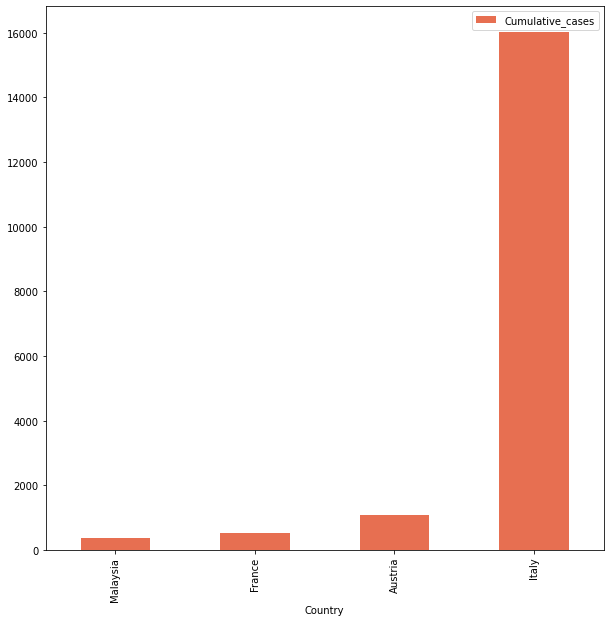

In [ ]:
group=dataFrame.groupby(['Country'])[['Cumulative_cases']].mean().sort_values(by='Cumulative_cases').tail(4).plot(kind='bar',figsize=(10,10),color='#E76F51')

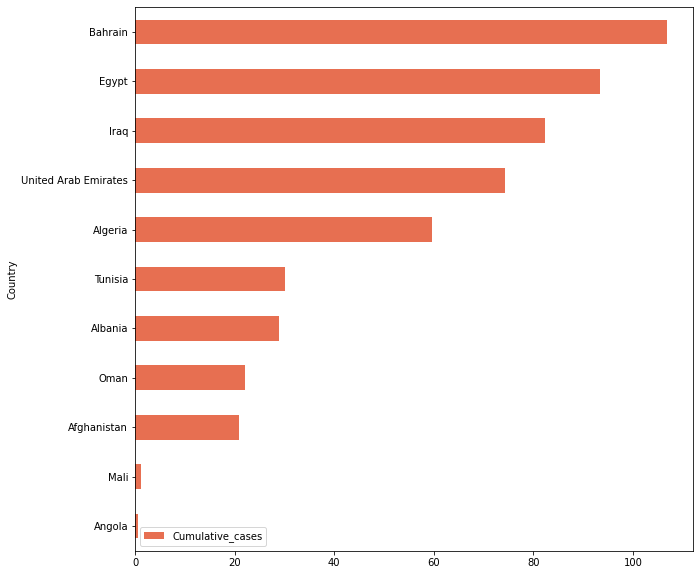

In [ ]:
group=dataFrame.groupby(['Country'])[['Cumulative_cases']].mean().sort_values(by='Cumulative_cases').head(11).plot(kind='barh',color='#E76F51',figsize=(10,10))


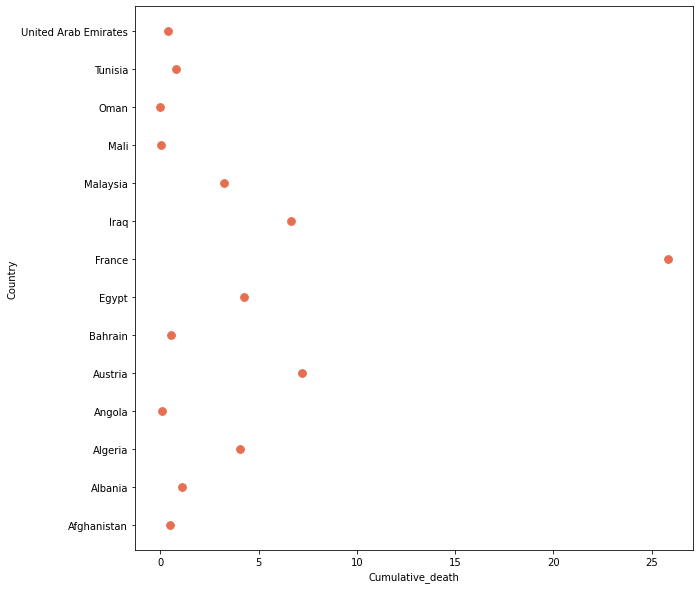

In [ ]:
df = dataFrame[(dataFrame['Country'] != 'Italy')]

group=df.groupby(['Country'],as_index=False)[['Cumulative_death']].mean().plot(kind='scatter',y='Country',x='Cumulative_death',figsize=(10,10),color='#E76F51',s=60)

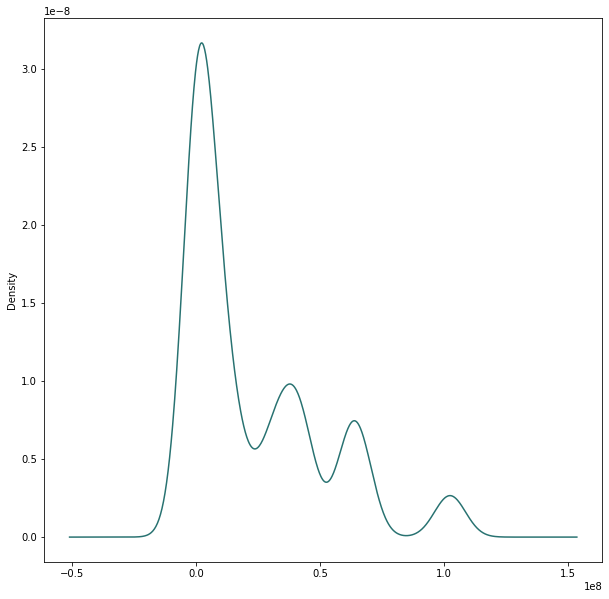

In [ ]:
dataFrame['Population'].plot(kind='density', figsize=(10,10),color='#287271')

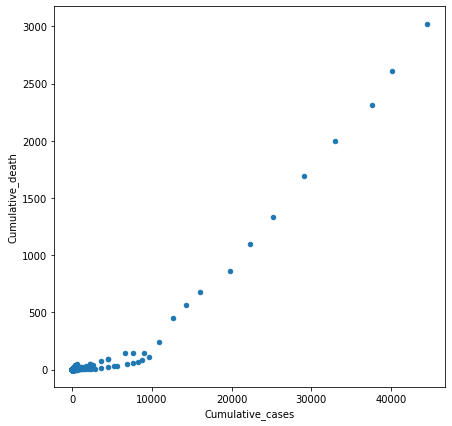

In [ ]:
df.plot(kind = 'scatter', x='Cumulative_cases', y='Cumulative_death', figsize=(7,7))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


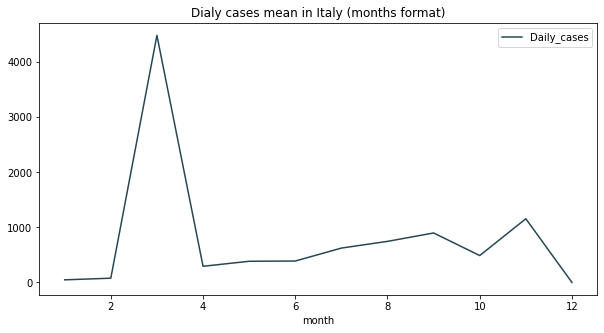

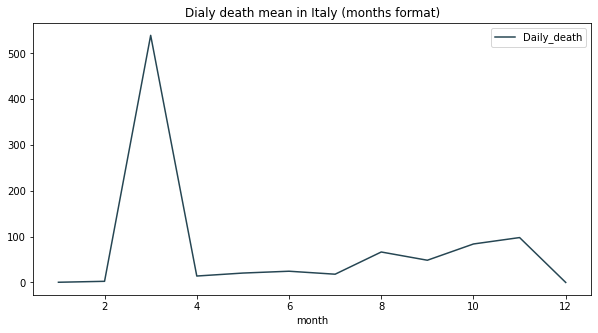

In [ ]:
df = dataFrame[(dataFrame['Country'] == 'Italy')]
df['month']= dataFrame['Date'].dt.month
group=df.groupby(['Country','month'],as_index=False)[['Daily_cases']].mean().plot(kind='line',x='month',y='Daily_cases',figsize=(10,5),color='#264653',title='Dialy cases mean in Italy (months format)')
group=df.groupby(['Country','month'],as_index=False)[['Daily_death']].mean().plot(kind='line',x='month',y='Daily_death',figsize=(10,5),color='#264653',title='Dialy death mean in Italy (months format)')

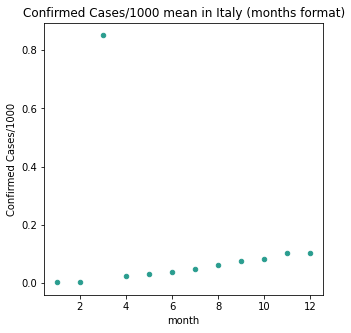

In [ ]:
group=df.groupby(['Country','month'],as_index=False)[['Confirmed Cases/1000']].mean().plot(kind = 'scatter', x='month', y='Confirmed Cases/1000', figsize=(5,5),title='Confirmed Cases/1000 mean in Italy (months format)',color='#2A9D8F')



# Preparing dataset for ML applications



In [ ]:
try:
  dataFrame.dropna(axis=1,how='all',inplace=True)
  dataFrame.dropna(axis=0,how='all',inplace=True)
  print(dataFrame.shape)
except:
  print("NO NULL Values")

(1657, 32)


In [ ]:
try:
  dataFrame.drop(['Unnamed: 31'], axis=1,inplace=True)
  dataFrame.shape
except:
  print("The column is already droped")

In [ ]:
try:
  dataFrame['State'].fillna('---',inplace=True)
except:
  print("NO NULL Values")

In [ ]:
try:
  dataFrame.replace(to_replace = 'Not Reported', value = np.nan,inplace=True)
  dataFrame.replace(to_replace = 'Not reported', value = np.nan,inplace=True)
  dataFrame.interpolate(method='linear',inplace=True)
except:
  print("NO (Not reported) values")

dataFrame

NO (Not reported) values


,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
1598,2020-01-02,---,France,6,0,1,0,46.227600,2.213700,1.61,...,1.625,0.000092,9.64,17.69,79.0,85.3,101046,44.474,89.322,268.152
1391,2020-01-02,Reunion,France,0,0,0,0,-21.135100,55.247100,27.17,...,1.625,0.000000,9.64,17.69,79.0,85.3,101046,44.474,89.322,268.152
701,2020-01-02,---,Mali,0,0,0,0,12.639167,-8.002778,28.61,...,0.025,0.000000,NaN,NaN,59.0,63.0,NaN,NaN,NaN,NaN
770,2020-01-02,---,Tunisia,0,0,0,0,34.000000,9.000000,13.33,...,0.575,0.000000,10.97,38.83,74.0,77.6,NaN,NaN,8.299,NaN
1184,2020-01-02,Martinique,France,0,0,0,0,14.666667,-61.000000,26.17,...,1.625,0.000000,9.64,17.69,79.0,85.3,101046,44.474,89.322,268.152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,2020-12-03,---,Tunisia,7,0,0,0,34.000000,9.000000,15.00,...,0.575,0.000592,10.97,38.83,74.0,77.6,NaN,NaN,8.299,NaN
879,2020-12-03,---,United Arab Emirates,85,0,11,0,24.000000,54.000000,21.61,...,0.300,0.008594,12.55,20.21,77.0,80.1,NaN,18.904,21.286,NaN
50,2020-12-03,---,Italy,12462,827,0,0,43.000000,12.000000,9.72,...,0.850,0.206114,12.78,22.78,80.0,85.2,541423,61.195,93,NaN
1293,2020-12-03,Mayotte,France,0,0,0,0,-12.827500,45.166200,26.39,...,1.625,0.000000,9.64,17.69,79.0,85.3,101046,44.474,89.322,268.152


In [ ]:
dataFrame[['Total_tests_conducted','Population Density/km','Lung Patients (F)','Lung Patients (M)','Out_Travels (mill.)','In_travels(mill.)','Domestic_Travels (mill.)']]=dataFrame[['Total_tests_conducted','Population Density/km','Lung Patients (F)','Lung Patients (M)','Out_Travels (mill.)','In_travels(mill.)','Domestic_Travels (mill.)']].astype(float)
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 1598 to 1431
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1657 non-null   datetime64[ns]
 1   State                     1657 non-null   object        
 2   Country                   1657 non-null   object        
 3   Cumulative_cases          1657 non-null   int64         
 4   Cumulative_death          1657 non-null   int64         
 5   Daily_cases               1657 non-null   int64         
 6   Daily_death               1657 non-null   int64         
 7   Latitude                  1657 non-null   float64       
 8   Longitude                 1657 non-null   float64       
 9   Temperature               1657 non-null   float64       
 10  Min_temperature           1657 non-null   float64       
 11  Max_temperature           1657 non-null   float64       
 12  Wind_speed       

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
  dataFrame['Life Expectancy (M)'].interpolate(method ='linear',limit_direction ='forward',inplace=True)
  dataFrame['Population Density/km'].interpolate(method ='linear',limit_direction ='forward',inplace=True)
  dataFrame['Lung Patients (F)'].interpolate(method ='linear',limit_direction ='forward',inplace=True)
  dataFrame['Lung Patients (M)'].interpolate(method ='linear',limit_direction ='forward',inplace=True)
  dataFrame['Sex_Ratio'].interpolate(method ='linear',limit_direction ='forward',inplace=True)
  dataFrame['Total_tests_conducted'].interpolate(method ='linear',limit_direction ='forward',inplace=True)
  dataFrame['Out_Travels (mill.)'].interpolate(method ='linear',limit_direction ='forward',inplace=True)
  dataFrame['In_travels(mill.)'].interpolate(method ='linear',limit_direction ='forward',inplace=True)
  dataFrame['Domestic_Travels (mill.)'].interpolate(method ='linear',limit_direction ='forward',inplace=True)
except:
  print("NO NULL Values")

In [ ]:
try:
  dataFrame.fillna(0,inplace=True)
except:
  print("NO NULL Values")

In [ ]:
dataFrame.isnull().sum()

Date                        0
State                       0
Country                     0
Cumulative_cases            0
Cumulative_death            0
Daily_cases                 0
Daily_death                 0
Latitude                    0
Longitude                   0
Temperature                 0
Min_temperature             0
Max_temperature             0
Wind_speed                  0
Precipitation               0
Fog_Presence                0
Population                  0
Population Density/km       0
Median_Age                  0
Sex_Ratio                   0
Age%_65+                    0
Hospital Beds/1000          0
Available Beds/1000         0
Confirmed Cases/1000        0
Lung Patients (F)           0
Lung Patients (M)           0
Life Expectancy (M)         0
Life Expectancy (F)         0
Total_tests_conducted       0
Out_Travels (mill.)         0
In_travels(mill.)           0
Domestic_Travels (mill.)    0
dtype: int64

In [ ]:
dataFrame.drop_duplicates(inplace=True)
dataFrame.shape

(1657, 31)

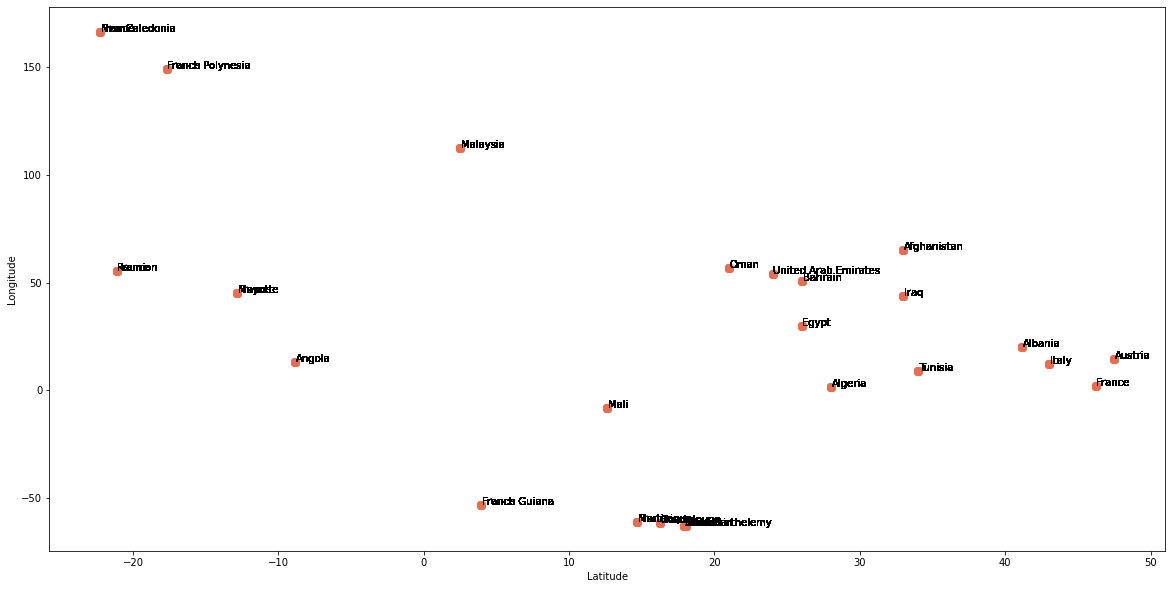

In [ ]:

figure=dataFrame.plot.scatter(x='Latitude', y='Longitude',figsize=(20,10),c='#E76F51',s=60) 

for i, txt in enumerate(dataFrame.Country):
   figure.annotate(txt, (dataFrame.Latitude.iat[i]+0.05, dataFrame.Longitude.iat[i]))
for i, txt in enumerate(dataFrame.State):
   if(txt=="---"):
    continue
   figure.annotate(txt, (dataFrame.Latitude.iat[i]+0.05, dataFrame.Longitude.iat[i]))

In [ ]:
agg_df1 = dataFrame.iloc[: ,3:25].agg(['min','max','mean', 'std'])
agg_df1

,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Min_temperature,Max_temperature,Wind_speed,...,Population,Population Density/km,Median_Age,Sex_Ratio,Age%_65+,Hospital Beds/1000,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M)
min,0.000000,0.000000,0.000000,0.000000,-22.275800,-63.050100,-15.440000,-18.110000,-13.500000,0.000000,...,9.131000e+03,16.000000,15.800000,0.930000,1.470000,0.100000,0.000000,0.000000,0.690000,12.180000
max,101739.000000,11591.000000,6557.000000,919.000000,47.516200,166.458000,33.170000,5537.720000,5537.720000,29.800000,...,1.023344e+08,2239.000000,47.000000,2.180000,21.690000,7.600000,2.040000,1.682698,36.310000,39.330000
mean,965.175015,74.774291,110.412794,9.083887,16.951863,24.686057,19.659378,317.543259,35.020229,6.897284,...,2.247905e+07,195.158419,34.604043,1.041361,12.322293,4.121967,0.963138,0.034392,11.389179,21.131605
std,6976.571288,684.349321,614.407268,69.448584,20.780454,60.626864,9.133475,1258.792689,234.595260,4.134990,...,2.751528e+07,434.431257,9.291461,0.245099,7.904372,2.584682,0.672354,0.137473,6.349188,7.101041


In [ ]:
agg_df2 = dataFrame.iloc[: ,23:27].agg(['mean', 'std'])
agg_df2

,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F)
mean,11.389179,21.131605,73.102897,79.784973
std,6.349188,7.101041,13.070298,7.342012


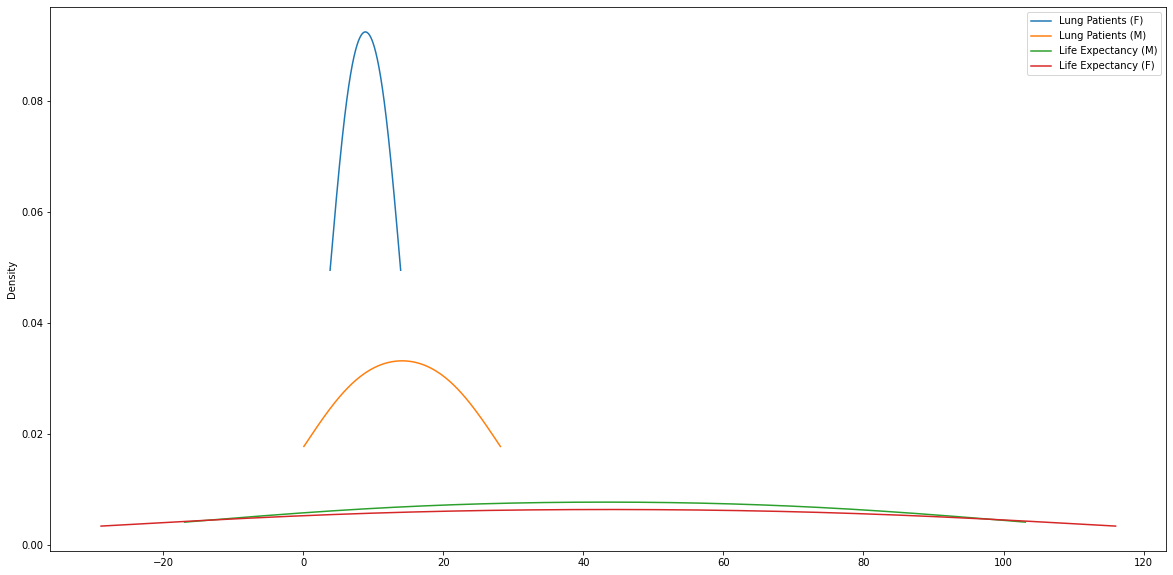

In [ ]:
p = agg_df2.plot(kind='density', figsize=(20,10))

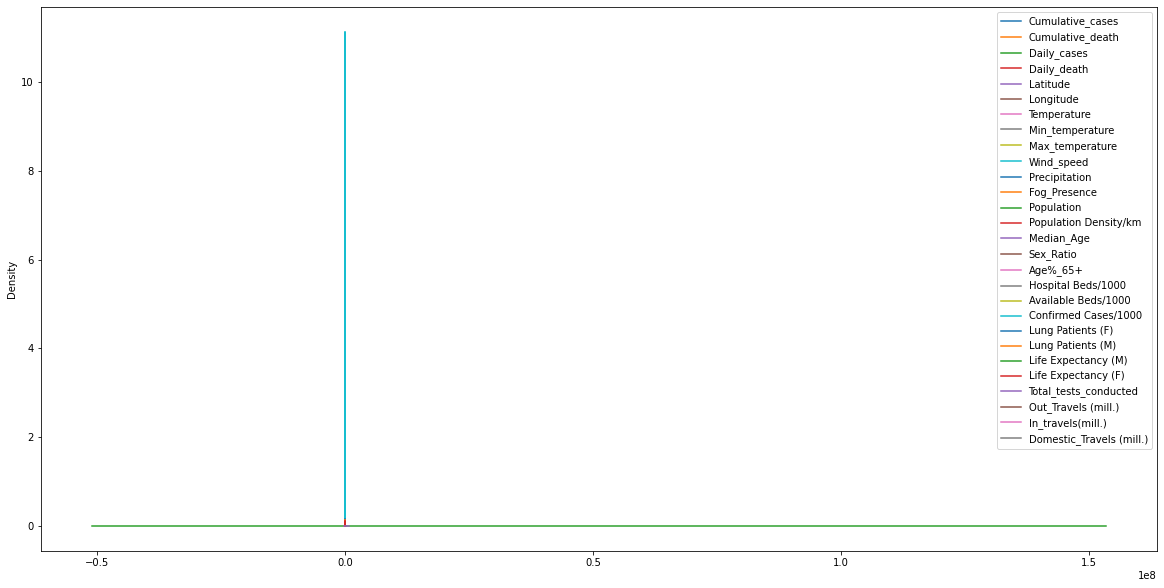

In [ ]:
plt2 = dataFrame.iloc[:,3:].plot(kind='density', figsize=(20,10))


In [ ]:
label_incoder = LabelEncoder()

for i in ['Country', 'State','Date']: 
  dataFrame[i] = label_incoder.fit_transform(dataFrame[i])

dataFrame

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
1598,0,0,7,6,0,1,0,46.227600,2.213700,1.61,...,1.625,0.000092,9.640,17.69,79.0,85.3,101046.000000,44.474,89.3220,268.152
1391,0,7,7,0,0,0,0,-21.135100,55.247100,27.17,...,1.625,0.000000,9.640,17.69,79.0,85.3,101046.000000,44.474,89.3220,268.152
701,0,0,11,0,0,0,0,12.639167,-8.002778,28.61,...,0.025,0.000000,10.305,28.26,59.0,63.0,101046.000000,44.474,48.8105,268.152
770,0,0,13,0,0,0,0,34.000000,9.000000,13.33,...,0.575,0.000000,10.970,38.83,74.0,77.6,101046.000000,44.474,8.2990,268.152
1184,0,4,7,0,0,0,0,14.666667,-61.000000,26.17,...,1.625,0.000000,9.640,17.69,79.0,85.3,101046.000000,44.474,89.3220,268.152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,70,0,13,7,0,0,0,34.000000,9.000000,15.00,...,0.575,0.000592,10.970,38.83,74.0,77.6,247838.333333,31.689,8.2990,268.152
879,70,0,14,85,0,11,0,24.000000,54.000000,21.61,...,0.300,0.008594,12.550,20.21,77.0,80.1,394630.666667,18.904,21.2860,268.152
50,70,0,9,12462,827,0,0,43.000000,12.000000,9.72,...,0.850,0.206114,12.780,22.78,80.0,85.2,541423.000000,61.195,93.0000,268.152
1293,70,5,7,0,0,0,0,-12.827500,45.166200,26.39,...,1.625,0.000000,9.640,17.69,79.0,85.3,101046.000000,44.474,89.3220,268.152


In [ ]:
col_list = list(dataFrame.columns)
x, y = col_list.index('Country'), col_list.index('Date')
col_list[y], col_list[x] = col_list[x], col_list[y]
dataFrame = dataFrame[col_list]

In [ ]:
dataFrame.iloc[:, 1:] = preprocessing.scale(dataFrame.iloc[:, 1:])
dataFrame

,Country,State,Date,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
1598,7,-0.648229,-1.735988,-0.137527,-0.109296,-0.178132,-0.13084,1.409237,-0.370779,-1.976775,...,0.984692,-0.249581,-0.275580,-0.484808,0.451320,0.751387,0.110707,-0.328416,-0.359365,-0.289625
1391,7,1.773286,-1.735988,-0.138387,-0.109296,-0.179760,-0.13084,-1.833380,0.504236,0.822566,...,0.984692,-0.250250,-0.275580,-0.484808,0.451320,0.751387,0.110707,-0.328416,-0.359365,-0.289625
701,11,-0.648229,-1.735988,-0.138387,-0.109296,-0.179760,-0.13084,-0.207599,-0.539343,0.980276,...,-1.395725,-0.250250,-0.170810,1.004155,-1.079329,-2.286844,0.110707,-0.328416,-0.383210,-0.289625
770,13,-0.648229,-1.735988,-0.138387,-0.109296,-0.179760,-0.13084,0.820641,-0.258809,-0.693196,...,-0.577457,-0.250250,-0.066041,2.493119,0.068658,-0.297688,0.110707,-0.328416,-0.407055,-0.289625
1184,7,0.735494,-1.735988,-0.138387,-0.109296,-0.179760,-0.13084,-0.110002,-1.413761,0.713046,...,0.984692,-0.250250,-0.275580,-0.484808,0.451320,0.751387,0.110707,-0.328416,-0.359365,-0.289625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,13,-0.648229,1.712206,-0.137383,-0.109296,-0.179760,-0.13084,0.820641,-0.258809,-0.510297,...,-0.577457,-0.245940,-0.066041,2.493119,0.068658,-0.297688,1.466066,-0.339201,-0.407055,-0.289625
879,14,-0.648229,1.712206,-0.126200,-0.109296,-0.161852,-0.13084,0.339274,0.483660,0.213633,...,-0.986591,-0.187716,0.182885,-0.129824,0.298255,0.042920,2.821425,-0.349987,-0.399411,-0.289625
50,9,-0.648229,1.712206,1.648417,1.099516,-0.179760,-0.13084,1.253871,-0.209311,-1.088565,...,-0.168323,1.249507,0.219121,0.232204,0.527852,0.737763,4.176784,-0.314311,-0.357200,-0.289625
1293,7,1.081425,1.712206,-0.138387,-0.109296,-0.179760,-0.13084,-1.433479,0.337908,0.737140,...,0.984692,-0.250250,-0.275580,-0.484808,0.451320,0.751387,0.110707,-0.328416,-0.359365,-0.289625


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataFrame.iloc[:, 1:]=pd.DataFrame(scaler.fit_transform(dataFrame.iloc[:, 1:]), columns=dataFrame.iloc[:, 1:].columns, index=dataFrame.iloc[:, 1:].index) 

In [ ]:
dataFrame.agg(['mean','std'])

,Country,State,Date,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
mean,6.989740,-3.323299e-17,-2.058301e-16,8.576255e-18,-8.576255e-18,-1.715251e-17,-1.715251e-17,-1.286438e-17,5.681769e-17,2.186945e-16,...,8.978267e-18,3.430502e-17,-2.323629e-16,6.266026e-16,4.025480e-16,1.286572e-15,-7.504223e-17,-4.180924e-17,-1.608048e-18,-1.029151e-16
std,3.423493,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,...,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00,1.000302e+00


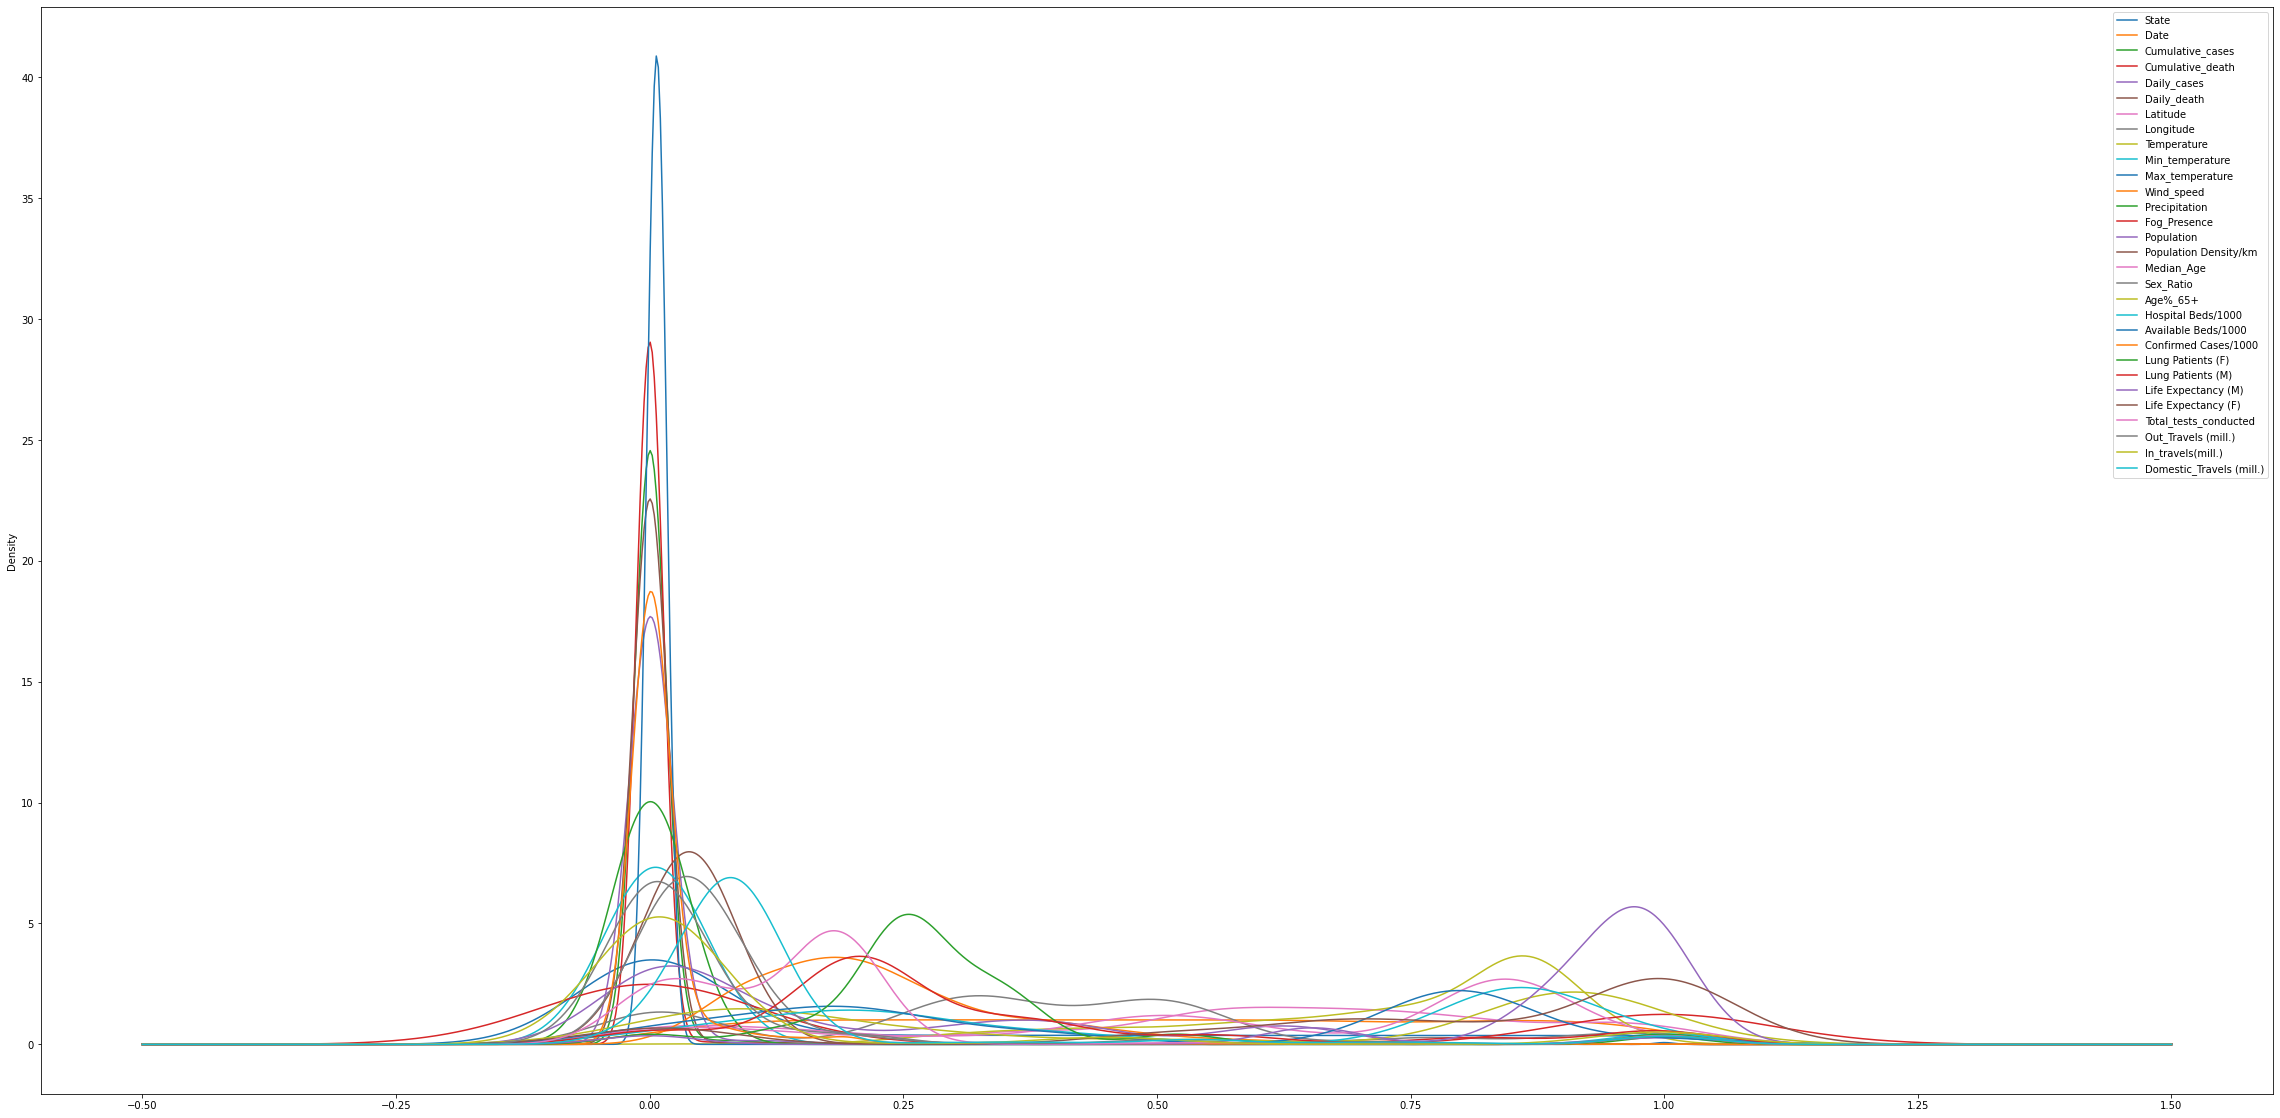

In [ ]:
dataFrame.iloc[:, 1:].plot(kind='density',figsize=(40,20))

In [ ]:
x = dataFrame.iloc[:,1:]
y = dataFrame.iloc[:,:1]

x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2)

In [ ]:
y_train

,Country
1015,7
1285,7
194,1
784,13
503,6
...,...
79,0
1239,7
71,0
159,1


In [ ]:
SVM_classifier = svm.SVC(kernel='linear')
SVM_classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
y_pred = SVM_classifier.predict(x_test)

In [ ]:
y_pred

array([ 7,  4,  3, 12,  7,  9,  4, 11,  1,  7,  7,  7,  7,  7,  2, 10,  9,
        1,  7, 11,  7,  7,  0,  7,  7,  7,  7,  9,  7,  7,  7,  1,  7,  6,
        7,  0,  5,  2,  7,  7,  7,  9, 10, 10,  9,  6,  5, 13,  6, 14,  7,
        0, 13,  7,  7,  8,  7,  7,  6,  7,  1,  0, 10, 11, 10, 10,  1,  7,
        1,  6, 11,  0,  7,  3,  7, 13,  8,  5,  3,  7,  8,  3,  7,  6,  7,
        7, 14,  7, 11,  7,  3,  4,  5,  9, 10,  7,  1,  8,  7,  7,  7,  7,
        7,  7, 10,  7,  7,  7,  1, 13,  7,  6,  6,  3,  7,  7,  7,  7,  3,
        9,  7, 14, 12, 14,  0,  7,  9,  8, 12, 10,  2,  5,  7,  7, 14,  8,
        7, 12,  7,  3,  5,  7,  1,  7,  7,  7, 10,  8,  7,  7,  6,  7, 12,
        4,  7, 10, 12,  7, 13,  7, 11, 14, 11,  7,  8,  6,  3,  7,  7,  0,
        3,  0, 14, 13,  9,  7,  7,  7, 11, 12,  7,  7, 12,  7,  7,  7,  7,
        3, 14, 12,  9,  1,  7,  4,  7,  7,  0,  7,  7,  7,  7,  1,  7,  7,
        7, 13,  7,  6,  9,  7,  1,  7,  2, 12,  7,  7,  7,  7,  7,  7,  9,
       13, 14, 13,  7,  1

In [ ]:
print('The accuracy:',metrics.accuracy_score(y_test, y_pred)*100,'%')

The accuracy: 100.0 %


In [ ]:
print("The precision:",metrics.precision_score(y_test, y_pred, average='weighted')*100,'%')

The precision: 100.0 %


In [ ]:
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted')*100,'%')

Recall: 100.0 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00       139
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        14

    accuracy                           1.00       332
   macro avg       1.00      1.00      1.00       332
weighted avg       1.00   

In [ ]:
NB_classifier = GaussianNB()
y_pred = NB_classifier.fit(x_train, y_train).predict(x_test)
print('The accuracy:',metrics.accuracy_score(y_test, y_pred)*100,'%')


The accuracy: 99.69879518072288 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
